In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 104us/step - loss: 0.2393 - accuracy: 0.9288 - val_loss: 0.1137 - val_accuracy: 0.9657
Epoch 2/10
48000/48000 [==============================] - 5s 96us/step - loss: 0.0926 - accuracy: 0.9720 - val_loss: 0.1012 - val_accuracy: 0.9692
Epoch 3/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.0637 - accuracy: 0.9796 - val_loss: 0.1010 - val_accuracy: 0.9706
Epoch 4/10
48000/48000 [==============================] - 5s 94us/step - loss: 0.0481 - accuracy: 0.9840 - val_loss: 0.0800 - val_accuracy: 0.9768
Epoch 5/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0841 - val_accuracy: 0.9768
Epoch 6/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.1088 - val_accuracy: 0.9737
Epoch 7/10
48000/48000 [==============================] - 5s 94us/s

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

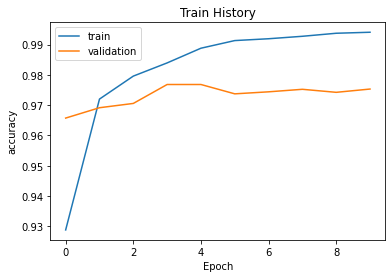

In [13]:
show_train_history(train_history,'accuracy','val_accuracy')

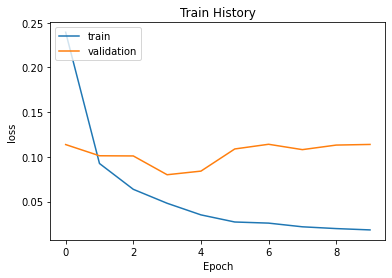

In [14]:
show_train_history(train_history,'loss','val_loss')

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 47us/step

accuracy= 0.9745000004768372
